<a id='0'></a>
# Содержание
[Описание проекта](#-1)<br>
[1 Задача 1: предсказание уровня удовлетворённости сотрудника](#1)<br>
[1.1 Загрузка данных](#1.1)<br>
[1.2 Предобработка данных](#1.2)<br>
[1.3 Исследовательский анализ данных](#1.3)<br>
[1.4 Подготовка данных](#1.4)<br>
[1.5 Обучение моделей](#1.5)<br>
[1.6 Вывод об уровне удовлетворённости работников](#1.6)<br>

[2 Задача 2: предсказание увольнения сотрудника из компании](#2)<br>
[2.1 Загрузка данных](#2.1)<br>
[2.2 Предобработка данных](#2.2)<br>
[2.3 Исследовательский анализ данных](#2.3)<br>
[2.4 Добавление нового входного признака](#2.4)<br>
[2.5 Подготовка данных](#2.5)<br>
[2.6 Обучение моделей](#2.6)<br>
[2.7 Вывод о предсказании увольнения работников](#2.7)<br>

[3 Общий вывод](#3)<br>

<a id='-1'></a>
# Описание проекта
[К содержанию](#0)<br><br>
**HR-аналитика компании «Работа с заботой»**<br><br>
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от `0` до `1`, где `0` — совершенно неудовлетворён, `1` — полностью удовлетворён.<br>
Поставлено несколько задач. *Первая* — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. *Вторая задача* — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Цель исследования**<br><br>
Целью исследования является определение уровня удовлетворённости сотрудника компании и предсказание вероятности увольнения сотрудника из компании.

**Ход исследования**<br><br>
В данном исследовании *две* задачи.<br>
Для *первой задачи* данные о сотрудниках хранятся в файлах `train_job_satisfaction_rate.csv`, `test_features.csv` и `test_target_job_satisfaction_rate.csv`. Первоначально проводятся анализ и предобработка полученных из файлов данных. Затем проводится исследовательский анализ обработанных данных, включающий статистический анализ всех признаков и их графическое представление. На следующем шаге подготавливаются данные и обучаются различные модели, из которых выбирается наиболее подходящая - с её помощью и делаются выводы.<br>
Данный для *второй задачи* хранятся в файлах `train_quit.csv`, `test_features.csv` и `test_target_quit.csv`. Также проводятся анализ, предобработка данных и исследовательский анализ данных. После этого добавляется новый входной признак, подгатавливаются данные и производится обучение моделей, на основании которых делаются выводы.<br><br>
Исходя из вышесказанного, определим этапы исследования следующим образом:<br>
**1. Задача 1:**
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Подготовка данных и обучение моделей
- Вывод о предсказании уровня удовлетворённости сотрудника<br>

**2. Задача 2:**
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Добавление нового входного признака
- Подготовка данных
- Обучение моделей
- Вывод о вероятности увольнения сотрудника

In [ ]:
#установка библиотек в окружение
!pip install phik -q
!pip install shap -q

In [ ]:
#импорт библиотек
import phik

import shap

import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns

import numpy as np

from scipy import stats as st

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import(
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

<a id='1'></a>
## Задача №1: предсказание уровня удовлетворённости сотрудника
[К содержанию](#0)

<a id='1.1'></a>
### Загрузка данных
[К содержанию](#0)

In [ ]:
#загрузка данных
try:
    train_job_satisfaction_rate = pd.read_csv('train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('test_features.csv')
    test_target_job_satisfaction_rate = pd.read_csv('test_target_job_satisfaction_rate.csv')
except:
    train_job_satisfaction_rate = pd.read_csv('C:\projects\prefab_project_2\train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('C:\projects\prefab_project_2\test_features.csv')
    test_target_job_satisfaction_rate = pd.read_csv('C:\projects\prefab_project_2\test_target_job_satisfaction_rate.csv')

In [ ]:
#вывод основной информации о датафрейме
dflist = {
    'train_job_satisfaction_rate': train_job_satisfaction_rate,
    'test_features': test_features,
    'test_target_job_satisfaction_rate': test_target_job_satisfaction_rate
}

def dfinf(df):
    print(f'Название датафрейма: {df}\n')
    dflist[df].info()
    display(dflist[df].head())

list(map(dfinf, dflist))

Название датафрейма: train_job_satisfaction_rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Название датафрейма: test_features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Название датафрейма: test_target_job_satisfaction_rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


[None, None, None]

**Загрузка датафреймов**<br><br>
Представлены *три датасета* для решения первой задачи.<br>
*Первый датасет* - `train_job_satisfaction_rate.csv` - тренировочная выборка данных опроса работников:
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

*Второй датасет* - `test_features.csv` - входные признаки тестовой выборки опроса работников. Содержит те же колонки, что и первый датасет, за исключением `job_satisfaction_rate` - это целевой признак для первой задачи.


В *третьем датасете* - `test_target_job_satisfaction_rate` — находится целевой признак тестовой выборки `job_satisfaction_rate` и уникальный идентификатор сотрудника `id`.

<a id='1.2'></a>
###  Предобработка данных
[К содержанию](#0)

In [ ]:
#проведем стартовую предобработку
def start_preproc(x):
    print(f'Название датафрейма: {x}\n')
    dflist[x].drop_duplicates(inplace=True)
    display(dflist[x].isnull().sum())
    display(dflist[x].describe(include='all'))

list(map(start_preproc, dflist))

Название датафрейма: train_job_satisfaction_rate



id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,3994,3996,4000,4000.000000,4000,4000,4000.000000,4000.000000,4000.000000
unique,NaN,5,3,3,NaN,2,2,NaN,NaN,NaN
top,NaN,sales,junior,medium,NaN,no,no,NaN,NaN,NaN
freq,NaN,1512,1894,2066,NaN,3880,3441,NaN,NaN,NaN
mean,544957.621000,NaN,NaN,NaN,3.718500,NaN,NaN,3.476500,33926.700000,0.533995
std,257883.104622,NaN,NaN,NaN,2.542513,NaN,NaN,1.008812,14900.703838,0.225327
min,100954.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000,0.030000
25%,322836.750000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,22800.000000,0.360000
50%,534082.500000,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000,0.560000
75%,771446.000000,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000,0.710000


Название датафрейма: test_features



id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
count,2000.000000,1998,1999,2000,2000.000000,2000,2000,2000.000000,2000.000000
unique,NaN,6,3,4,NaN,2,2,NaN,NaN
top,NaN,sales,junior,medium,NaN,no,no,NaN,NaN
freq,NaN,763,974,1043,NaN,1937,1738,NaN,NaN
mean,552765.213500,NaN,NaN,NaN,3.666500,NaN,NaN,3.526500,34066.800000
std,253851.326129,NaN,NaN,NaN,2.537222,NaN,NaN,0.996892,15398.436729
min,100298.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000
25%,339052.000000,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,22800.000000
50%,550793.000000,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000
75%,765763.750000,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000


Название датафрейма: test_target_job_satisfaction_rate



id                       0
job_satisfaction_rate    0
dtype: int64

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


[None, None, None]

In [ ]:
#проверим неявные пропуски
display(test_features['dept'].unique())
display(test_features['workload'].unique())

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

array(['medium', 'low', 'high', ' '], dtype=object)

In [ ]:
#создадим пайплайн для заполнения пропусков
fullfill = Pipeline(
    [
        (
            'simpleImputer_nan',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'simpleImputer_null',
            SimpleImputer(missing_values=' ', strategy='most_frequent'),
        )
    ]
)

In [ ]:
#заполним пропуски с помощью пайплайна
null_columns = ['dept', 'level', 'workload']
train_job_satisfaction_rate[null_columns] = fullfill.fit_transform(train_job_satisfaction_rate[null_columns])
test_features[null_columns] = fullfill.transform(test_features[null_columns])

In [ ]:
#проверим заполнение
display(dflist['train_job_satisfaction_rate'].isnull().sum())
display(dflist['test_features'].isnull().sum())
display(test_features['dept'].unique())
display(test_features['workload'].unique())

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

array(['marketing', 'hr', 'sales', 'purchasing', 'technology'],
      dtype=object)

array(['medium', 'low', 'high'], dtype=object)

**Предобработка данных**<br><br>
При стартовой предобработке данных были обнаружены пустые ячейки в столбцах `dept` и `level` таблиц `train_job_satisfaction_rate` и `test_features`. Для заполнения этих пропусков был использован пайплайн `fullfill`, который поместил в пустые ячейки наиболее часто встречающееся значение, т.е. *моду*.

<a id='1.3'></a>
### Исследовательский анализ данных
[К содержанию](#0)

[None, None, None]

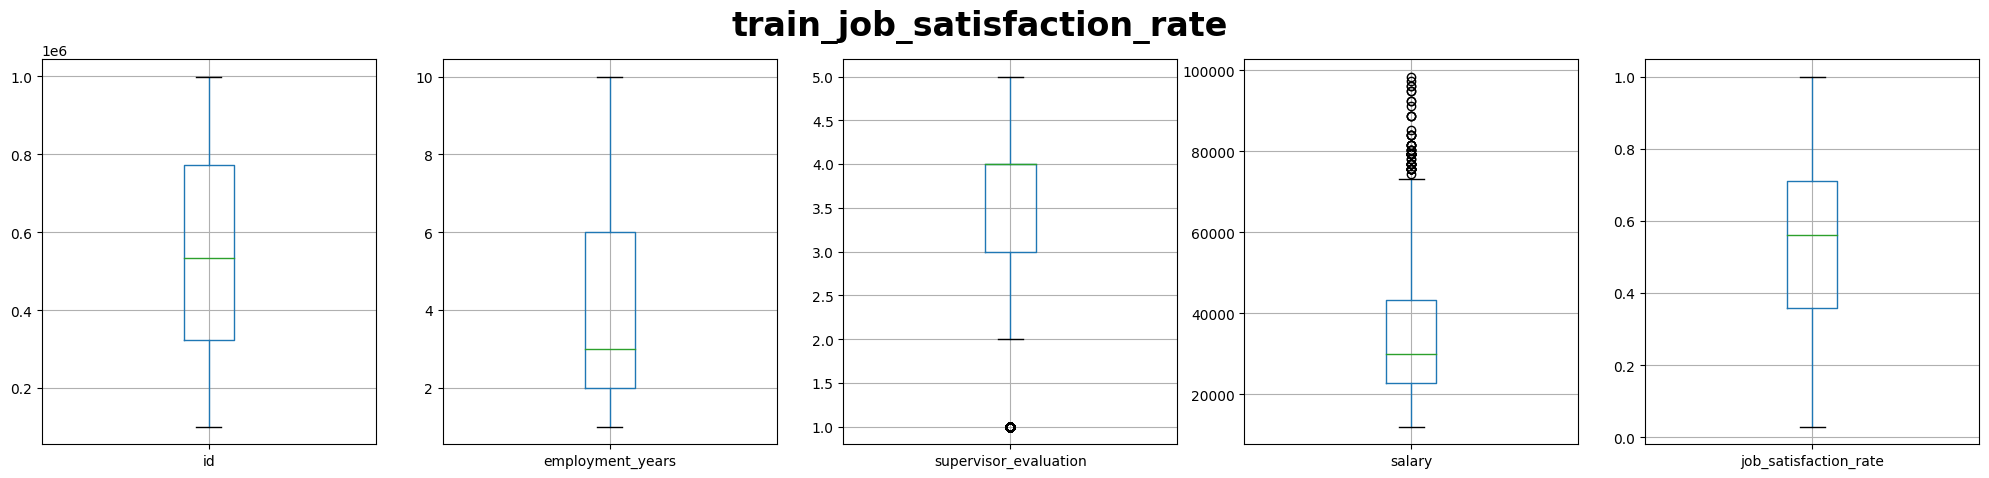

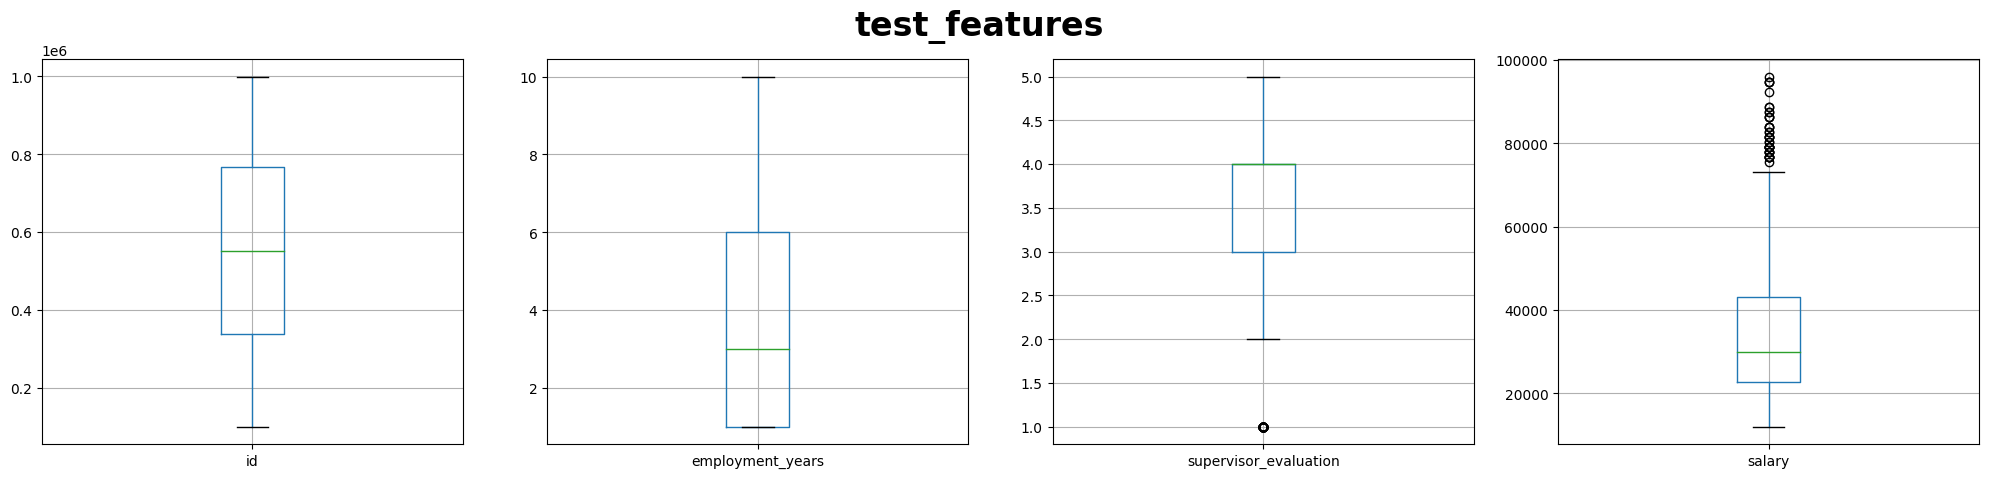

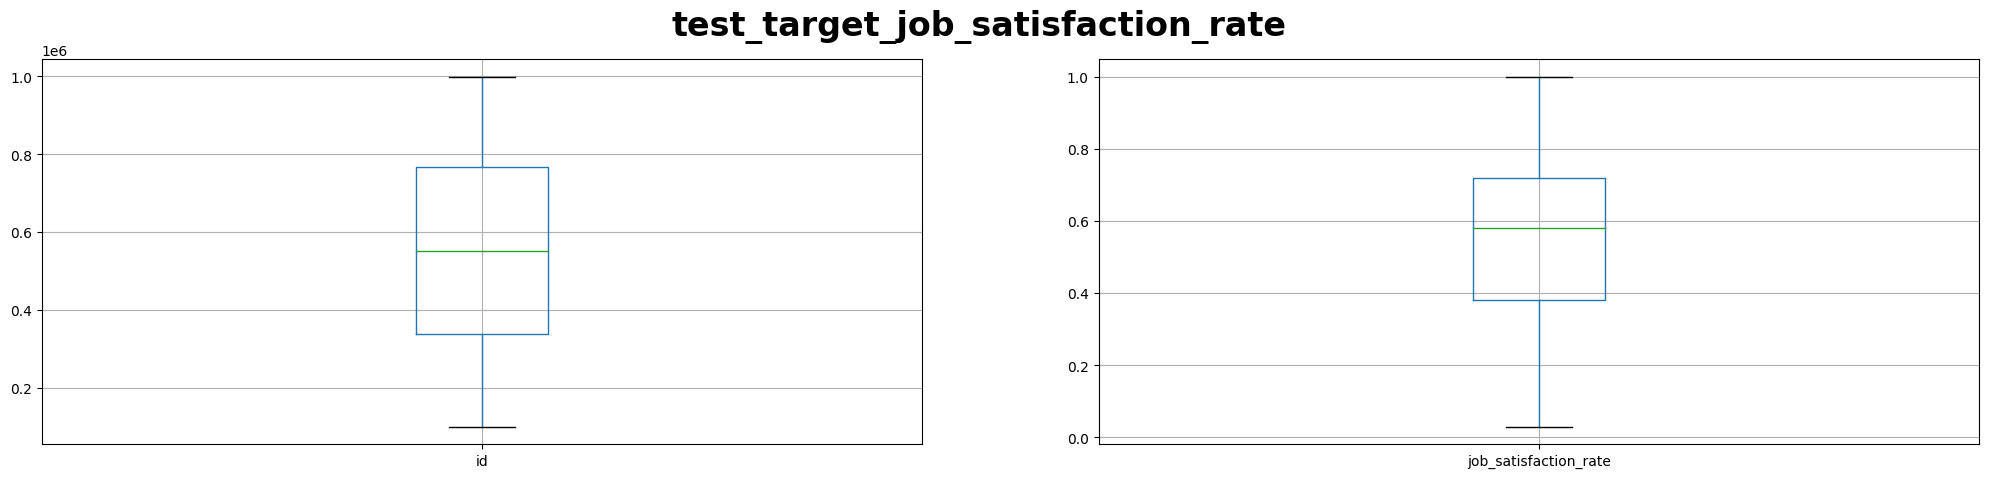

In [ ]:
#построим диаграммы размаха для всех датафреймов
def boxplt_df(x):
    x_col = dflist[x].select_dtypes(include='number').columns.tolist()
    fig, axes = plt.subplots(1, len(x_col), figsize = (25,5))
    fig.suptitle(x, fontsize = 24, fontweight='bold')
    for y in x_col:
        dflist[x].boxplot(column=y, ax=axes[x_col.index(y)]);

list(map(boxplt_df, dflist))

In [ ]:
#зададим вспомогательные функции для построения графиков
def pieplt (df, col, name, axes):
    df.value_counts(col).plot.pie(title=name, ylabel='', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},\
                       legend=False, autopct='%0.2f%%', fontsize=10, ax=axes);

def barhplt (df, col, name, axes):
    df.value_counts(col, ascending=True).plot.barh(title=name, ylabel='', xlabel='',\
                       legend=False, alpha=0.5, fontsize=10, ax=axes);

def histplt (df, col, name, axes, bins):
    df[col].plot.hist(bins=bins, title=name, fontsize=10, ax=axes, alpha=0.5);

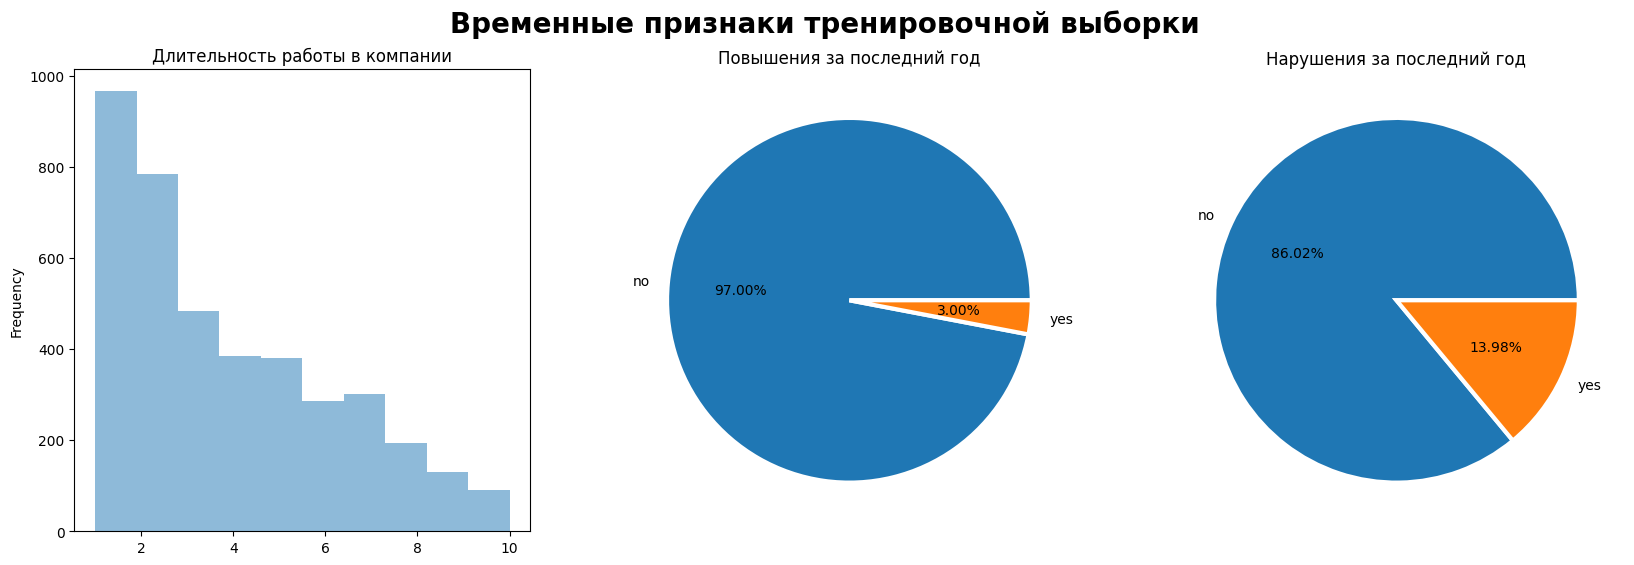

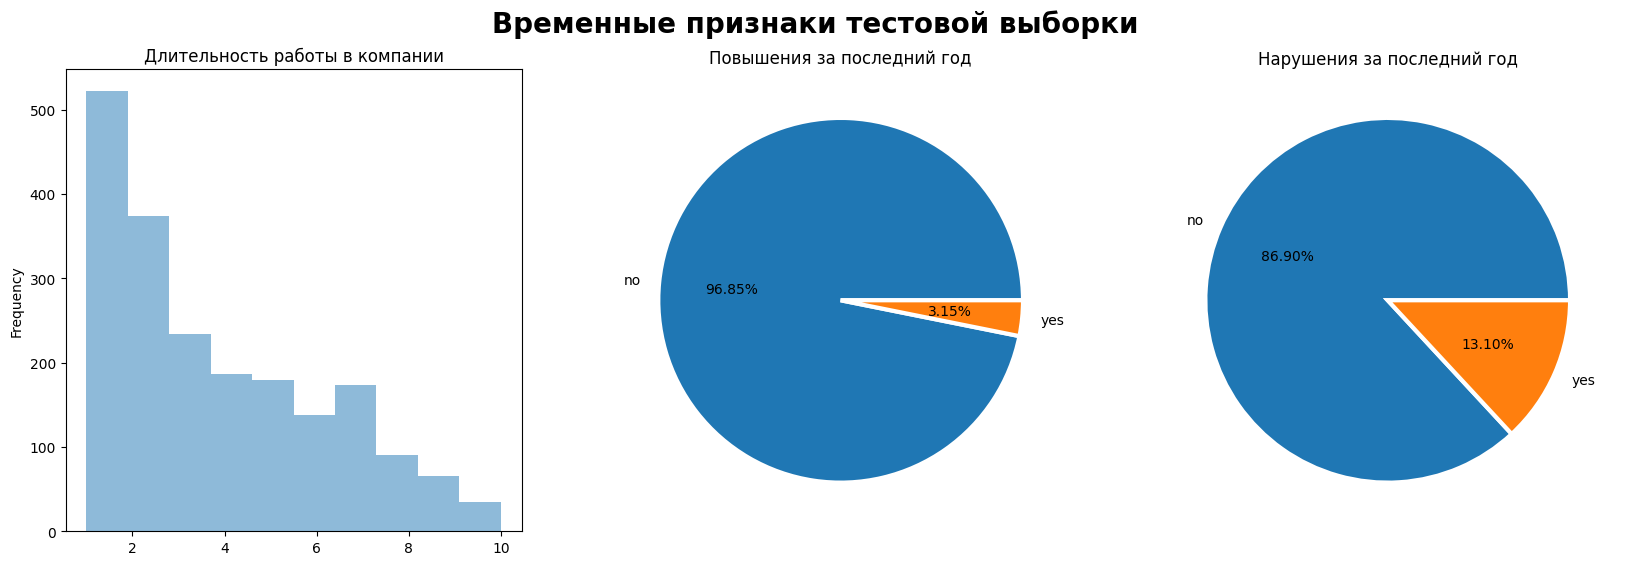

In [ ]:
#построим графическое представление всех признаков по первой задаче
#временные показатели
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Временные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
histplt(train_job_satisfaction_rate, 'employment_years', 'Длительность работы в компании', axes[0], 10)
pieplt(train_job_satisfaction_rate, 'last_year_promo', 'Повышения за последний год', axes[1])
pieplt(train_job_satisfaction_rate, 'last_year_violations', 'Нарушения за последний год', axes[2])
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Временные признаки тестовой выборки', fontsize = 20, fontweight='bold')
histplt(test_features, 'employment_years', 'Длительность работы в компании', axes[0], 10)
pieplt(test_features, 'last_year_promo', 'Повышения за последний год', axes[1])
pieplt(test_features, 'last_year_violations', 'Нарушения за последний год', axes[2])

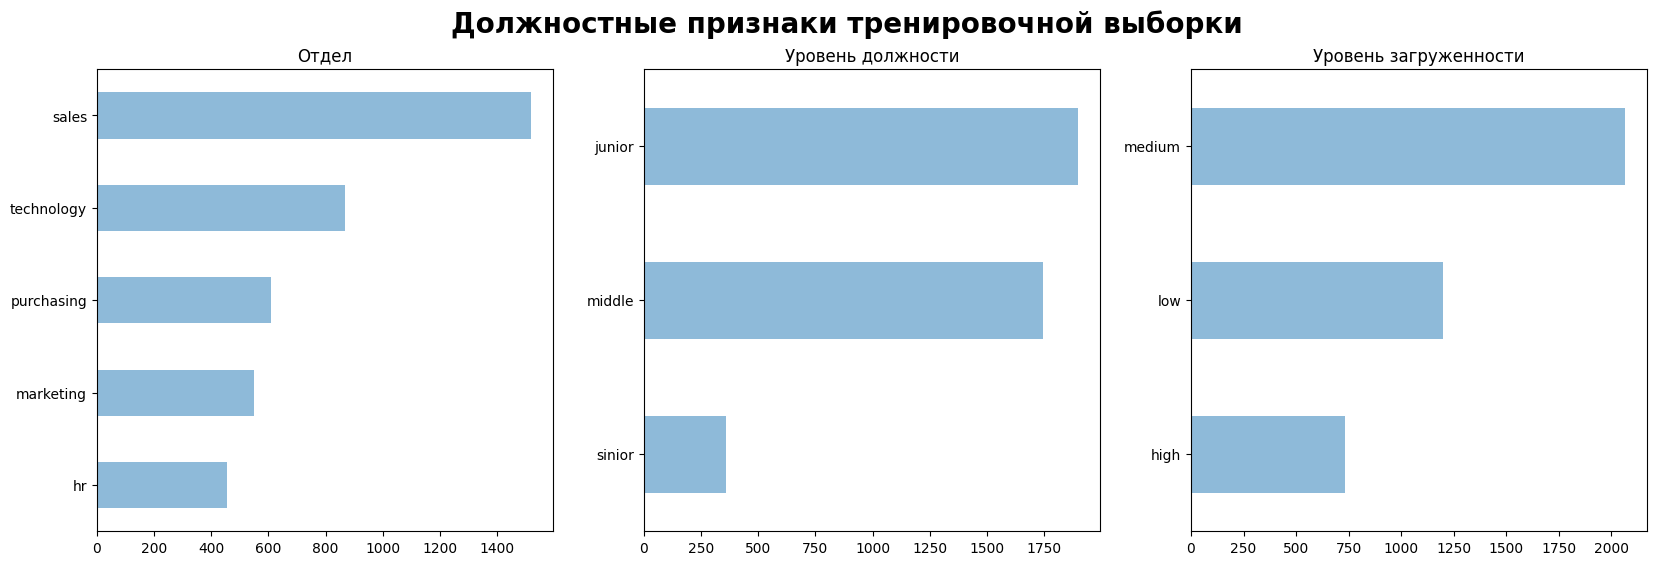

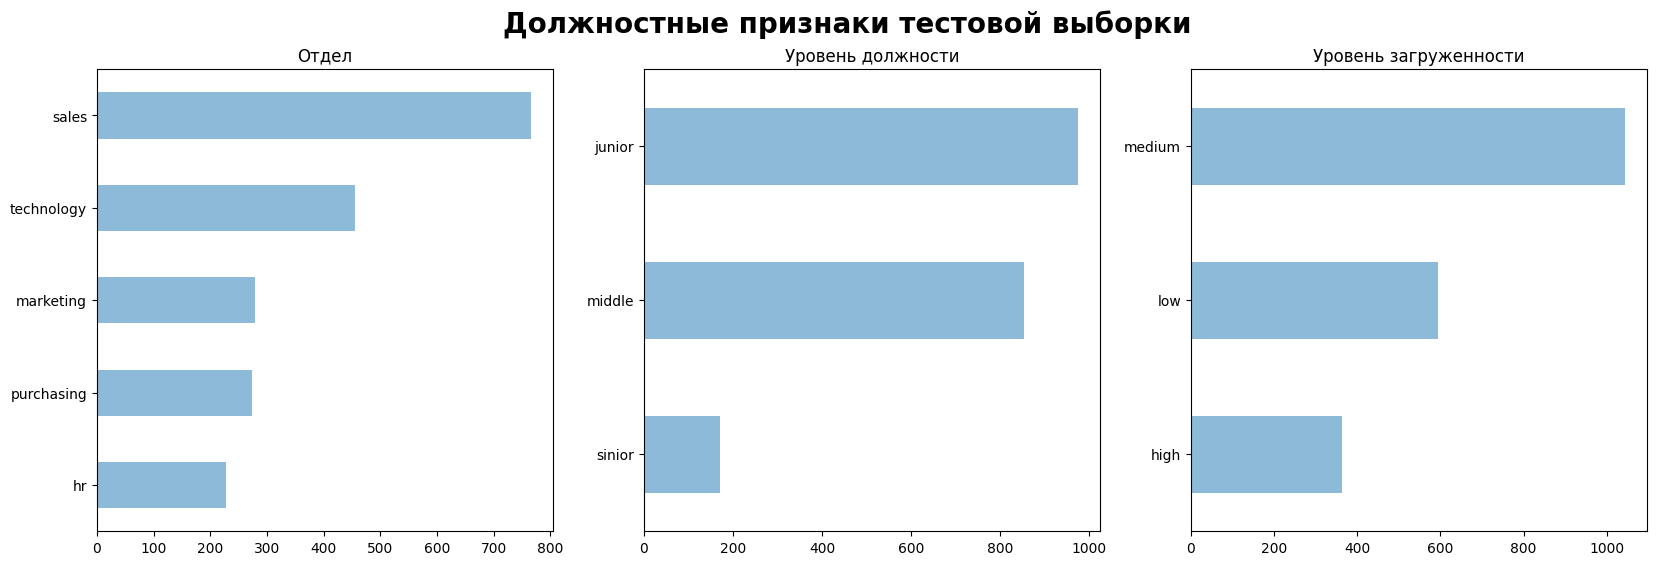

In [ ]:
#должностные показатели тренировочной выборки
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Должностные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
barhplt(train_job_satisfaction_rate, 'dept', 'Отдел', axes[0])
barhplt(train_job_satisfaction_rate, 'level', 'Уровень должности', axes[1])
barhplt(train_job_satisfaction_rate, 'workload', 'Уровень загруженности', axes[2])
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Должностные признаки тестовой выборки', fontsize = 20, fontweight='bold')
barhplt(test_features, 'dept', 'Отдел', axes[0])
barhplt(test_features, 'level', 'Уровень должности', axes[1])
barhplt(test_features, 'workload', 'Уровень загруженности', axes[2])

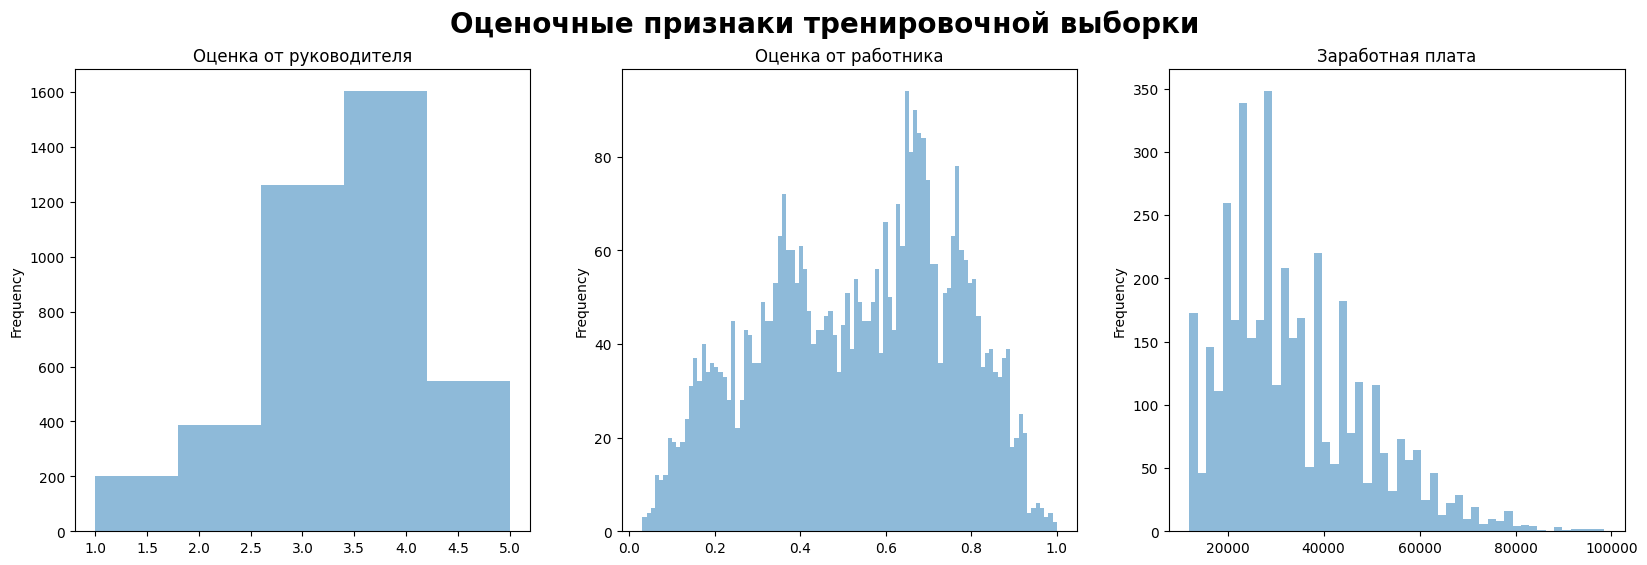

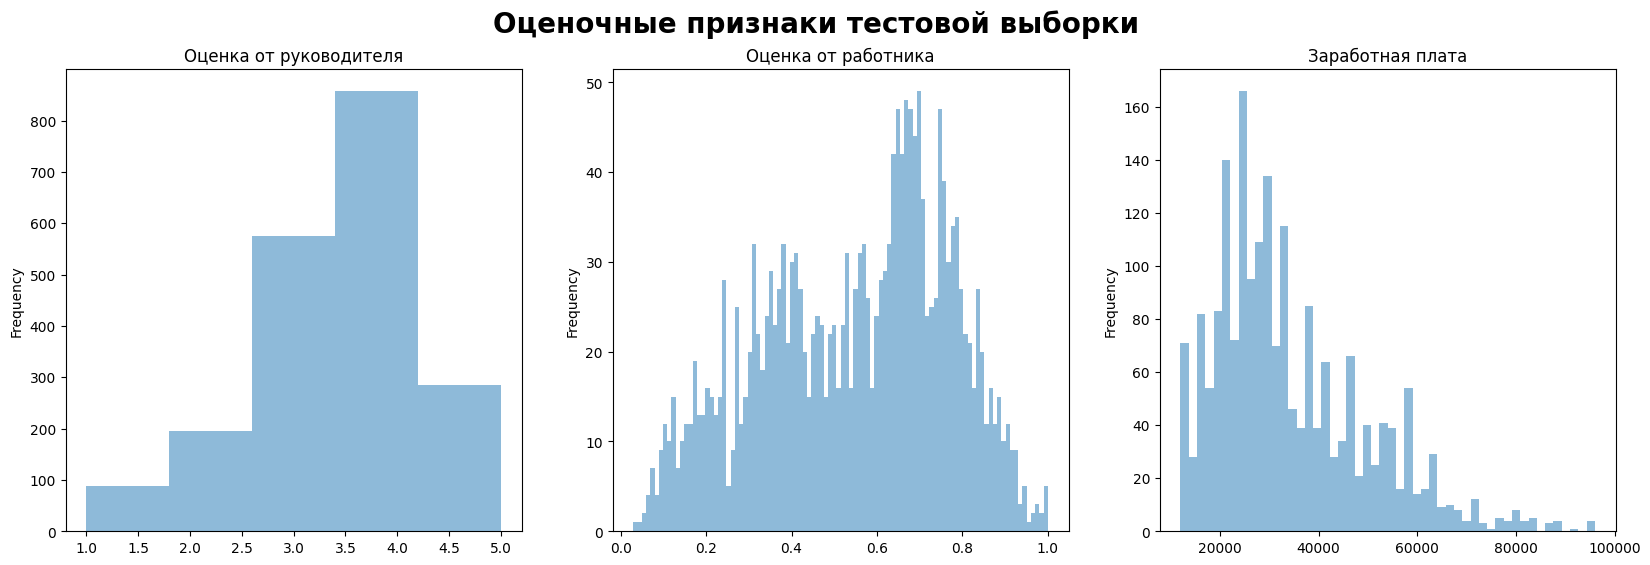

In [ ]:
#оценочные показатели тренировочной выборки
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Оценочные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
histplt(train_job_satisfaction_rate, 'supervisor_evaluation', 'Оценка от руководителя', axes[0], 5)
histplt(train_job_satisfaction_rate, 'job_satisfaction_rate', 'Оценка от работника', axes[1], 98)
histplt(train_job_satisfaction_rate, 'salary', 'Заработная плата', axes[2], 50)
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Оценочные признаки тестовой выборки', fontsize = 20, fontweight='bold')
histplt(test_features, 'supervisor_evaluation', 'Оценка от руководителя', axes[0], 5)
histplt(test_target_job_satisfaction_rate, 'job_satisfaction_rate', 'Оценка от работника', axes[1], 98)
histplt(test_features, 'salary', 'Заработная плата', axes[2], 50)

**Анализ данных**<br><br>
`Длительность работы в компании` по годам распределена ожидаемо - максимальное количество работников имеет стаж *1 год*, а далее идёт уменьшение с минимальным значением количества работников на *10 годах*. Из интересного можно заметить пик на *7 годах* - видимо, работодатель активно набирал сотрудников в этот период. `Повышение` за последний год получали всего *3.00 - 3.15%* работников, а за `нарушениями` замечены *13.10 - 13.98%* сотрудников. <br>
С большим отрывом по `количеству сотрудников` лидирует *отдел продаж*. Естественно, больше всего `должностей` уровня *джуниор*, а меньше всего *синьоров*. Уровень `загруженности` колеблется вокруг *среднего*. У большинства работников он именно такой, на втором месте *низкая* загруженность, и меньше всего людей *сильно загружены*.<br>
`Руководители` оценивают своих работников на *4* и *3* - то есть *хорошо* и *удовлетворительно*. Пик `оценки самих работников` расположен в районе *0.7-0.8*, что можно назвать соответсвующим пику оценке от руководителя. Чаще всего `заработная плата` находится в диапазоне *20000-30000 рублей*.<br>
В целом распределения **тренировочной** и **тестовой** выборок достаточно близки - это касается как количественных, так и категориальных признаков.

<a id='1.4'></a>
### Подготовка данных
[К содержанию](#0)

In [ ]:
#выделим индентификатор как индекс
train_job_satisfaction_rate.set_index('id', inplace=True)

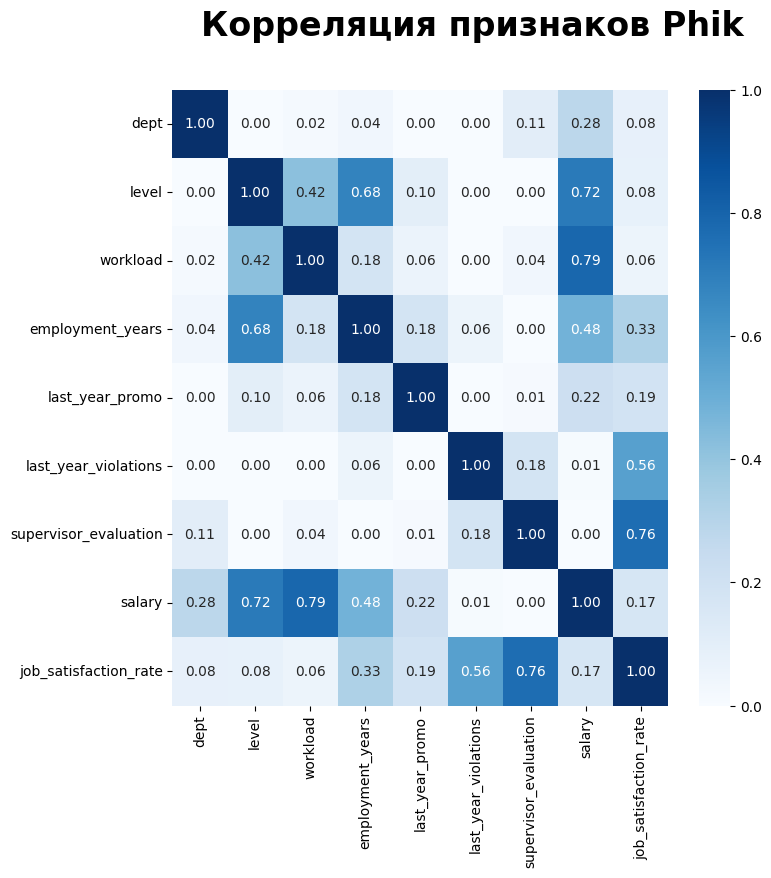

In [ ]:
#узнаем коэффициенты корреляции по Phik
fig, axes = plt.subplots(1, 1, figsize = (8,8))
fig.suptitle('Корреляция признаков Phik', fontsize = 24, fontweight='bold')

interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

sns.heatmap(train_job_satisfaction_rate.phik_matrix(interval_cols=interval_cols),\
            annot=True, fmt='.2f', cmap='Blues', ax=axes);

In [ ]:
#Разделим тренировочный датасет на входные признаки и целевой признак
RANDOM_STATE = 42

X_train = train_job_satisfaction_rate.drop(columns=['job_satisfaction_rate'])
y_train = train_job_satisfaction_rate['job_satisfaction_rate']

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = X_train.select_dtypes(include='number').columns.tolist()

In [ ]:
#создадим пайплайн для OHE-кодирования
ohe_pipe = Pipeline(
    [
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

In [ ]:
#создадим пайплайн для Ordinal-кодирования
ord_pipe = Pipeline(
    [
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        )
    ]
)

In [ ]:
#создадим пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

**Подготовка данных**<br><br>
Из-за ненормальности распределения признаков, а также наличия категориальных признаков, для анализа корреляций используем коэффициент **ϕk**. Наивысшая корреляция *0.79* наблюдается между признаками `workload` и `salary`. О мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю - здесь подобных значений не встречается, поэтому на этом основании признаки удалять не будем.<br>
Для правильного кодирования необходимо разделить признаки на **категориальные, ранговые и количественные**. К *категориальным* отнесём `dept, last_year_promo, last_year_violations`. Ранговые признаки в нашем случае будут включать `level, workload` - у них можно проследить порядок (`уровень загруженности` распределен от низкого до высокого, а `уровень должности` от джуниора до сеньора). Остальные признаки относятся к количественным (`employment_years, supervisor_evaluation, salary`). После распределения по типам признаков создаем пайплайн `data_preprocessor` для предобработки, который будем использовать в дальнейшем.

<a id='1.5'></a>
### Обучение моделей
[К содержанию](#0)

In [ ]:
#соберем итоговый пайплайн
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [ ]:
#подготовим параметры для моделей
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,1000),
        'models__min_samples_leaf': range(2,4),
        'models__min_samples_split': range(2,4),
        'models__max_leaf_nodes': range(2,1000),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [ ]:
#зададим собственную метрику SMAPE
def smape(pred, test):
    return 100/len(pred) * np.sum(2 * np.abs(test - pred) / (np.abs(pred) + np.abs(test)))

scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
#сравним модели
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', (randomized_search.best_score_)*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                      

In [ ]:
#подготовим тестовую выборку и проверим метрику на ней
test_job_satisfaction_rate = test_features.merge(test_target_job_satisfaction_rate, on='id').set_index('id')

X_test = test_job_satisfaction_rate.drop(columns=['job_satisfaction_rate'])
y_test = test_job_satisfaction_rate['job_satisfaction_rate']

y_test_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test, y_test_pred)}')

Метрика SMAPE на тестовой выборке: 13.161117927242891


**Предсказание уровня удовлетворенности работника**<br><br>
Для предсказания уровня удовлетворенности работника использовались *две* модели - `DecisionTreeRegressor и LinearRegression`. С помощью пайплайна `pipe_final` перебором гиперпараметров алгоритмом `RandomizedSearch` была выбрана лучшая модель - **DecisionTreeRegressor (max_depth=548, max_leaf_nodes=980, min_samples_leaf=2, random_state=42)**. Модель выбиралась с помощью собственной метрики **SMAPE**. Критерий успеха: *SMAPE* ≤15 на тестовой выборке. В нашем случае метрика на тестовой выборке равна *13.16* - таким образом, условие выполнено.

<a id='1.6'></a>
### Вывод об уровне удовлетворённости работников
[К содержанию](#0)

Лучшей моделью по результатам `RandomizedSearch` признана **DecisionTreeRegressor** - древо решений, используемой для задач регресии. Одна из проблем древа решений - это вероятность *переобучения*. При исследовательском анализе было выявлено, что распределения тренировочных и тестовых выборок сильно похожи. Благодаря этому метрика **SMAPE**, с помощью которой проводился анализ, на тестовой выборке (*13.16%*) показала даже лучший результат, чем на тренировочной (*14.06%*). На гистограммах заметны несколько пиков, а в этом случае древо решений позволяет лучше описать эти особенности с помощью детального описания параметрами `max_depth, max_leaf_nodes, min_samples_leaf`.

<a id='2'></a>
## Задача №2: предсказание увольнения сотрудника из компании
[К содержанию](#0)

<a id='2.1'></a>
### Загрузка данных
[К содержанию](#0)

In [ ]:
#загрузка данных
try:
    train_quit = pd.read_csv('train_quit.csv')
    test_target_quit = pd.read_csv('test_target_quit.csv')
except:
    train_quit = pd.read_csv('C:\projects\prefab_project_2\train_quit.csv')
    test_target_quit = pd.read_csv('C:\projects\prefab_project_2\test_target_quit.csv')

In [ ]:
#вывод основной информации о датафрейме
dflist = {
    'train_quit': train_quit,
    'test_target_quit': test_target_quit
}

list(map(dfinf, dflist))

Название датафрейма: train_quit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Название датафрейма: test_target_quit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


[None, None]

**Загрузка датафреймов**<br><br>
В дополнение к первой задаче представлены *два датасета* для решения второй задачи.<br>
*Первый датасет* - `train_quit.csv` - тренировочная выборка для предсказания увольнения сотрудника:
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `quit` — увольнение сотрудника из компании.

Во *втором датасете* - `test_target_quit` — находится целевой признак тестовой выборки `quit` и уникальный идентификатор сотрудника `id`.

Также для решения второй задачи используется *второй датасет из первой задачи* - `test_features.csv` - входные признаки тестовой выборки опроса работников.

<a id='2.2'></a>
###  Предобработка данных
[К содержанию](#0)

In [ ]:
#проведем стартовую предобработку
list(map(start_preproc, dflist))

Название датафрейма: train_quit



id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
count,4000.000000,4000,4000,4000,4000.000000,4000,4000,4000.000000,4000.000000,4000
unique,NaN,5,3,3,NaN,2,2,NaN,NaN,2
top,NaN,sales,junior,medium,NaN,no,no,NaN,NaN,no
freq,NaN,1438,1949,2118,NaN,3887,3455,NaN,NaN,2872
mean,552099.283750,NaN,NaN,NaN,3.701500,NaN,NaN,3.474750,33805.800000,NaN
std,260158.031387,NaN,NaN,NaN,2.541852,NaN,NaN,1.004049,15152.415163,NaN
min,100222.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000,NaN
25%,327785.750000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,22800.000000,NaN
50%,546673.000000,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000,NaN
75%,781497.750000,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000,NaN


Название датафрейма: test_target_quit



id      0
quit    0
dtype: int64

,id,quit
count,2000.000000,2000
unique,NaN,2
top,NaN,no
freq,NaN,1436
mean,552765.213500,NaN
std,253851.326129,NaN
min,100298.000000,NaN
25%,339052.000000,NaN
50%,550793.000000,NaN
75%,765763.750000,NaN


[None, None]

**Предобработка данных**<br><br>
При стартовой предобработке пустые ячейки не были обнаружены, а распределения количественных признаков не демонстрировали каких-либо аномалий.

<a id='2.3'></a>
### Исследовательский анализ данных
[К содержанию](#0)

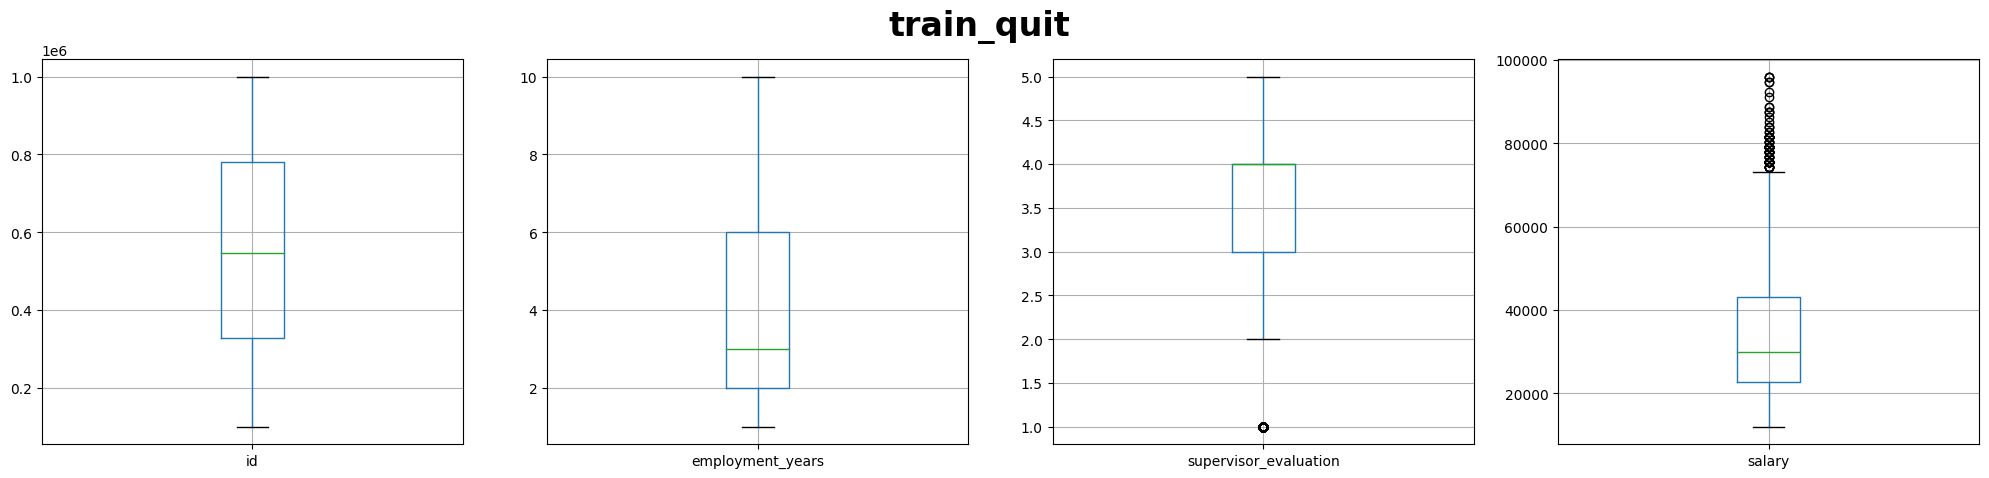

In [ ]:
#построим диаграммы размаха для всех датафреймов - здесь только один датасет
train_quit_col = dflist['train_quit'].select_dtypes(include='number').columns.tolist()
fig, axes = plt.subplots(1, len(train_quit_col), figsize = (25,5))
fig.suptitle('train_quit', fontsize = 24, fontweight='bold')
for y in train_quit_col:
    dflist['train_quit'].boxplot(column=y, ax=axes[train_quit_col.index(y)]);

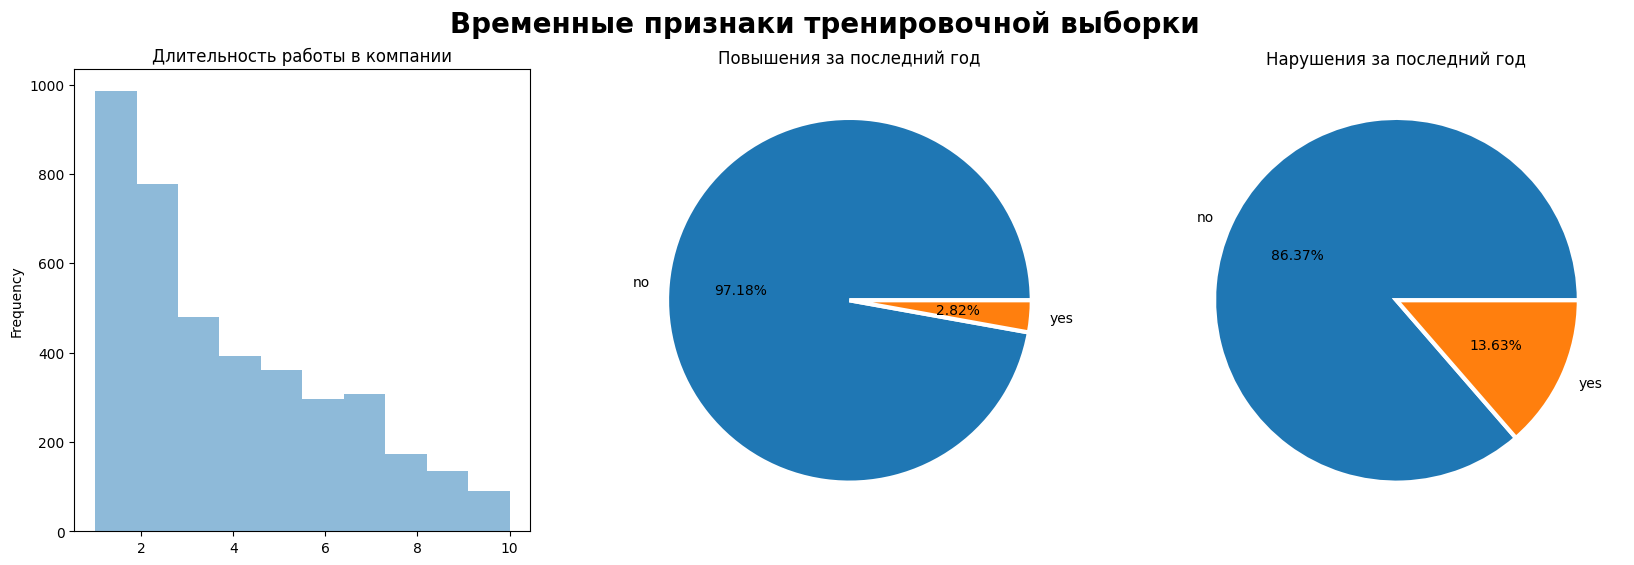

In [ ]:
#построим графическое представление всех признаков по второй задаче
#временные показатели
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Временные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
histplt(train_quit, 'employment_years', 'Длительность работы в компании', axes[0], 10)
pieplt(train_quit, 'last_year_promo', 'Повышения за последний год', axes[1])
pieplt(train_quit, 'last_year_violations', 'Нарушения за последний год', axes[2])

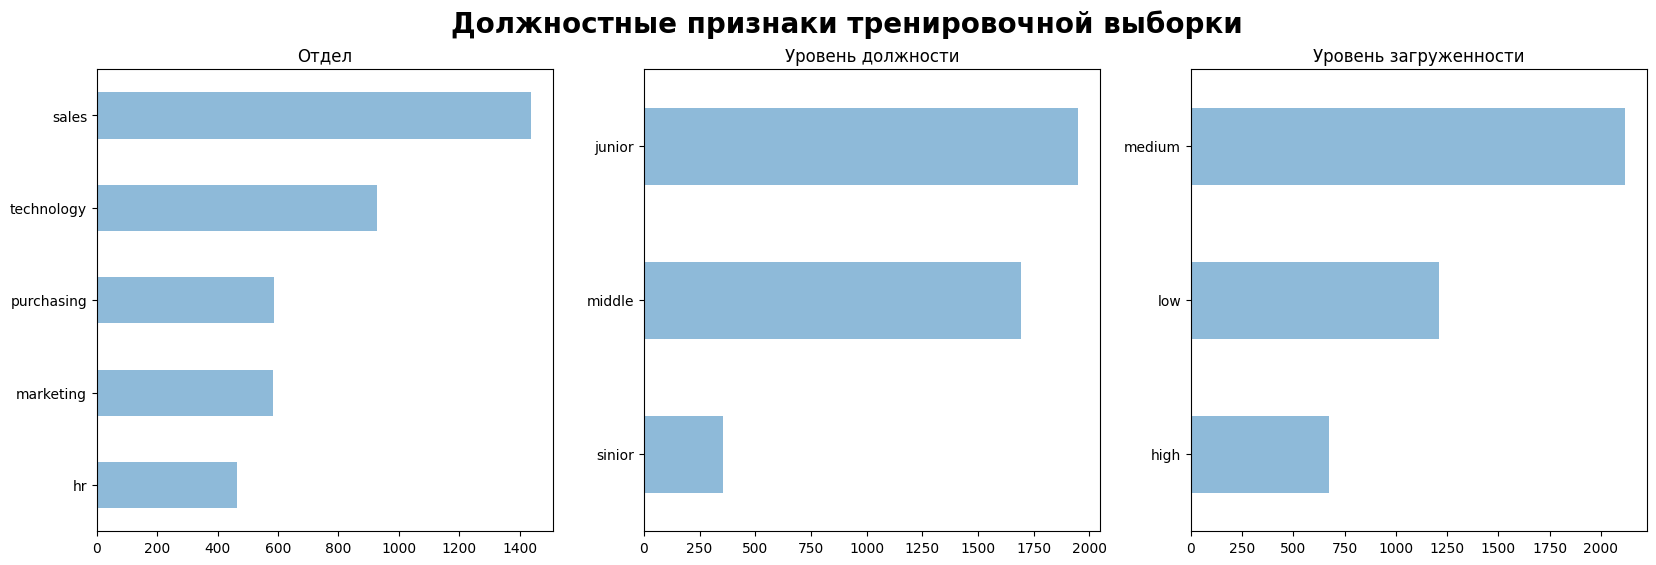

In [ ]:
#должностные показатели тренировочной выборки
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Должностные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
barhplt(train_quit, 'dept', 'Отдел', axes[0])
barhplt(train_quit, 'level', 'Уровень должности', axes[1])
barhplt(train_quit, 'workload', 'Уровень загруженности', axes[2])

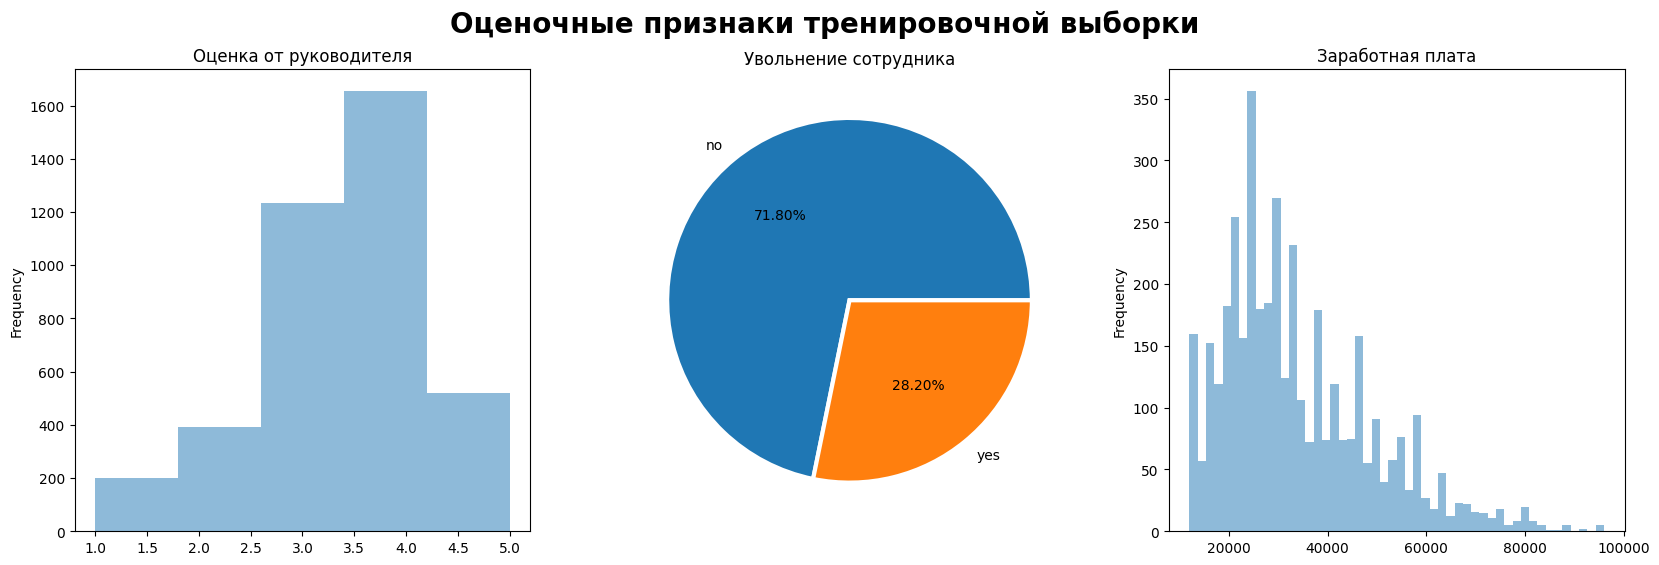

In [ ]:
#оценочные показатели тренировочной выборки
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Оценочные признаки тренировочной выборки', fontsize = 20, fontweight='bold')
histplt(train_quit, 'supervisor_evaluation', 'Оценка от руководителя', axes[0], 5)
pieplt(train_quit, 'quit', 'Увольнение сотрудника', axes[1])
histplt(train_quit, 'salary', 'Заработная плата', axes[2], 50)

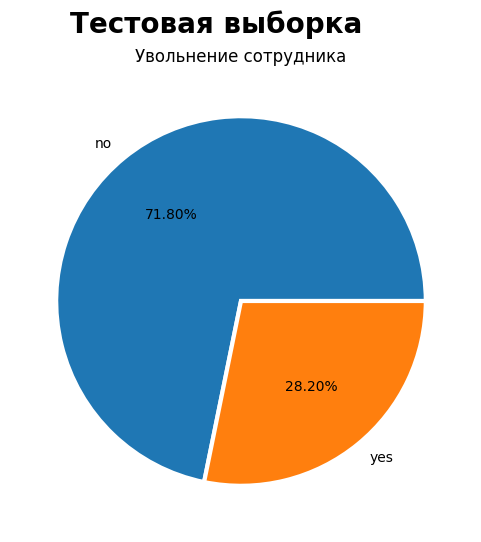

In [ ]:
#тестовая выборка
fig, axes = plt.subplots(1, 1, figsize = (20,6))
fig.suptitle('Тестовая выборка', fontsize = 20, fontweight='bold')
pieplt(test_target_quit, 'quit', 'Увольнение сотрудника', axes)

In [ ]:
#выделим два датасета - с уволившимися и оставшимися сотрудниками
train_quit.set_index('id', inplace=True)
train_quit_yes = train_quit.query('quit == "yes"')
train_quit_no = train_quit.query('quit == "no"')

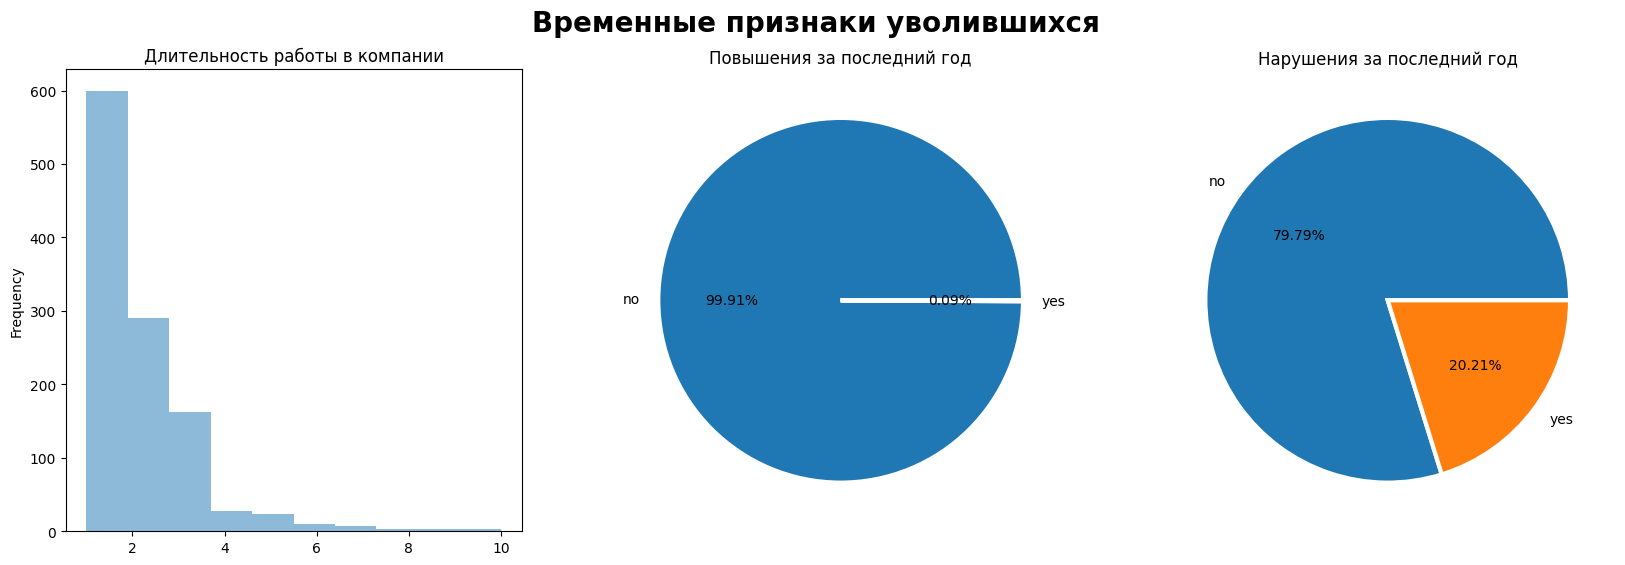

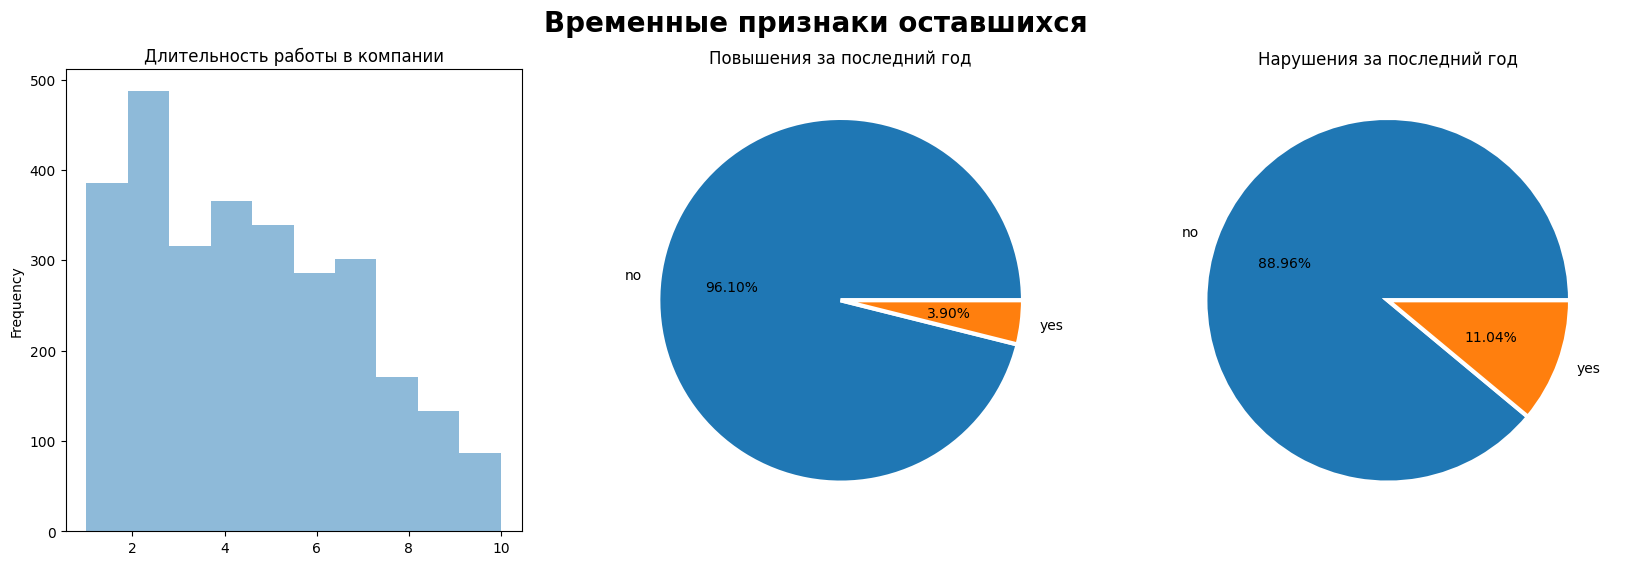

In [ ]:
#сравним уволившихся и оставшихся сотрудников
#временные показатели
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Временные признаки уволившихся', fontsize = 20, fontweight='bold')
histplt(train_quit_yes, 'employment_years', 'Длительность работы в компании', axes[0], 10)
pieplt(train_quit_yes, 'last_year_promo', 'Повышения за последний год', axes[1])
pieplt(train_quit_yes, 'last_year_violations', 'Нарушения за последний год', axes[2])
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Временные признаки оставшихся', fontsize = 20, fontweight='bold')
histplt(train_quit_no, 'employment_years', 'Длительность работы в компании', axes[0], 10)
pieplt(train_quit_no, 'last_year_promo', 'Повышения за последний год', axes[1])
pieplt(train_quit_no, 'last_year_violations', 'Нарушения за последний год', axes[2])

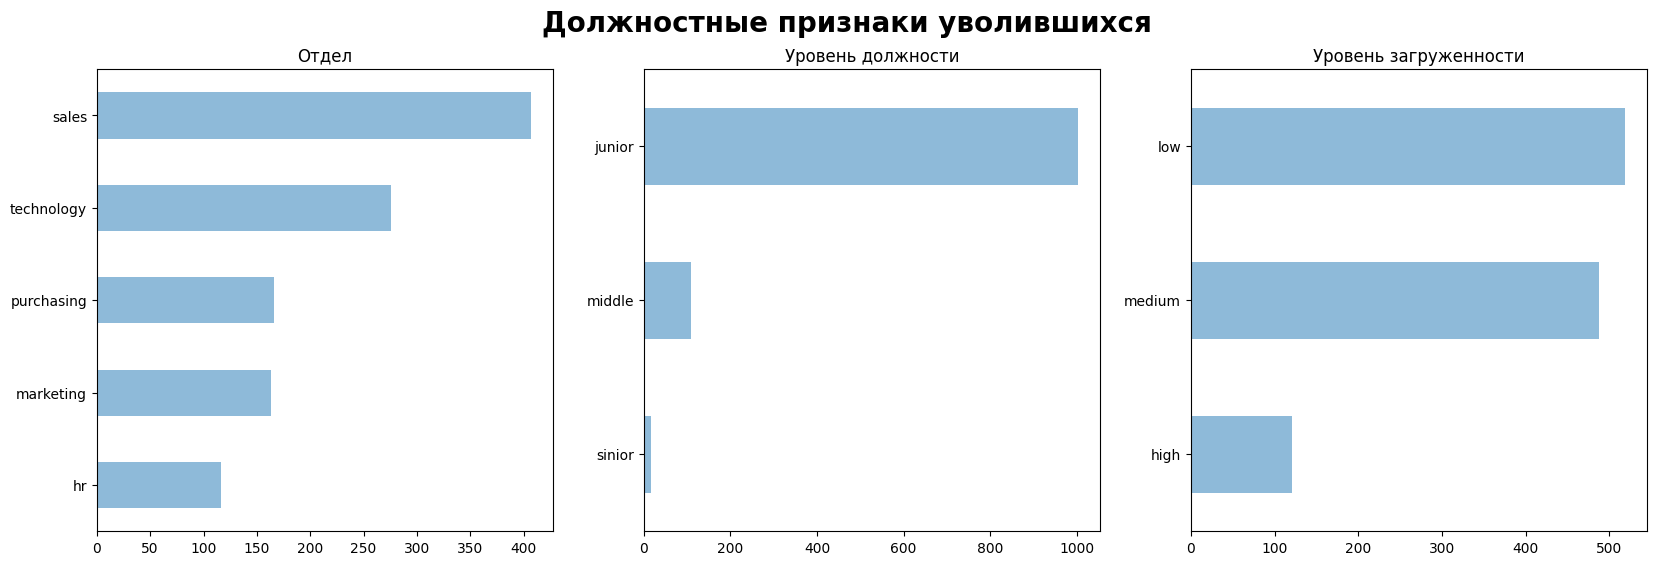

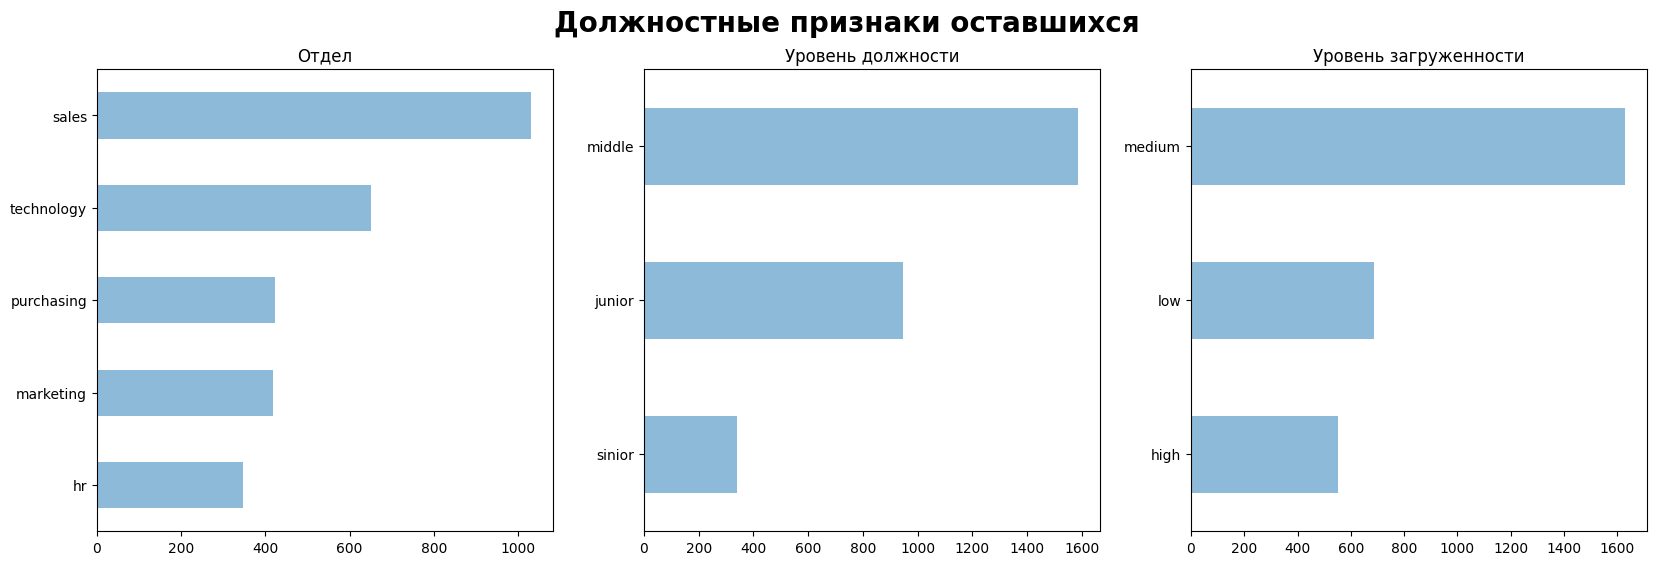

In [ ]:
#должностные показатели
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Должностные признаки уволившихся', fontsize = 20, fontweight='bold')
barhplt(train_quit_yes, 'dept', 'Отдел', axes[0])
barhplt(train_quit_yes, 'level', 'Уровень должности', axes[1])
barhplt(train_quit_yes, 'workload', 'Уровень загруженности', axes[2])
fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Должностные признаки оставшихся', fontsize = 20, fontweight='bold')
barhplt(train_quit_no, 'dept', 'Отдел', axes[0])
barhplt(train_quit_no, 'level', 'Уровень должности', axes[1])
barhplt(train_quit_no, 'workload', 'Уровень загруженности', axes[2])

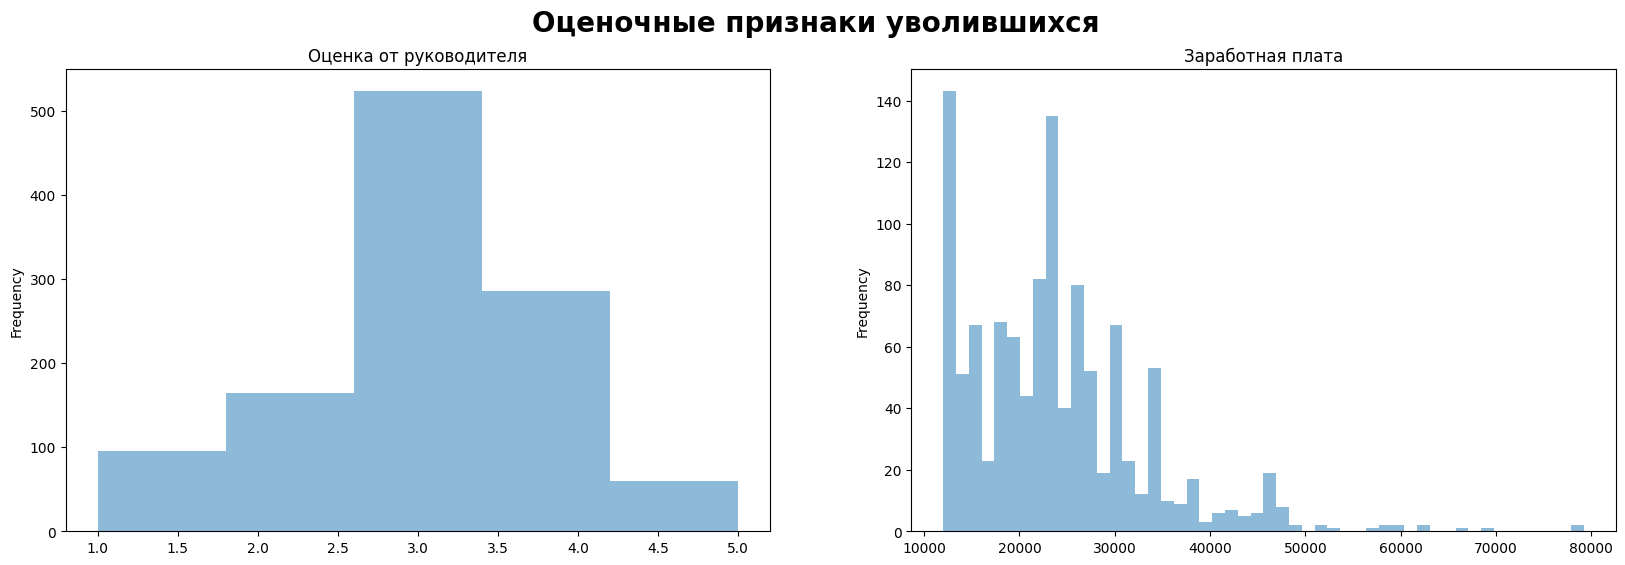

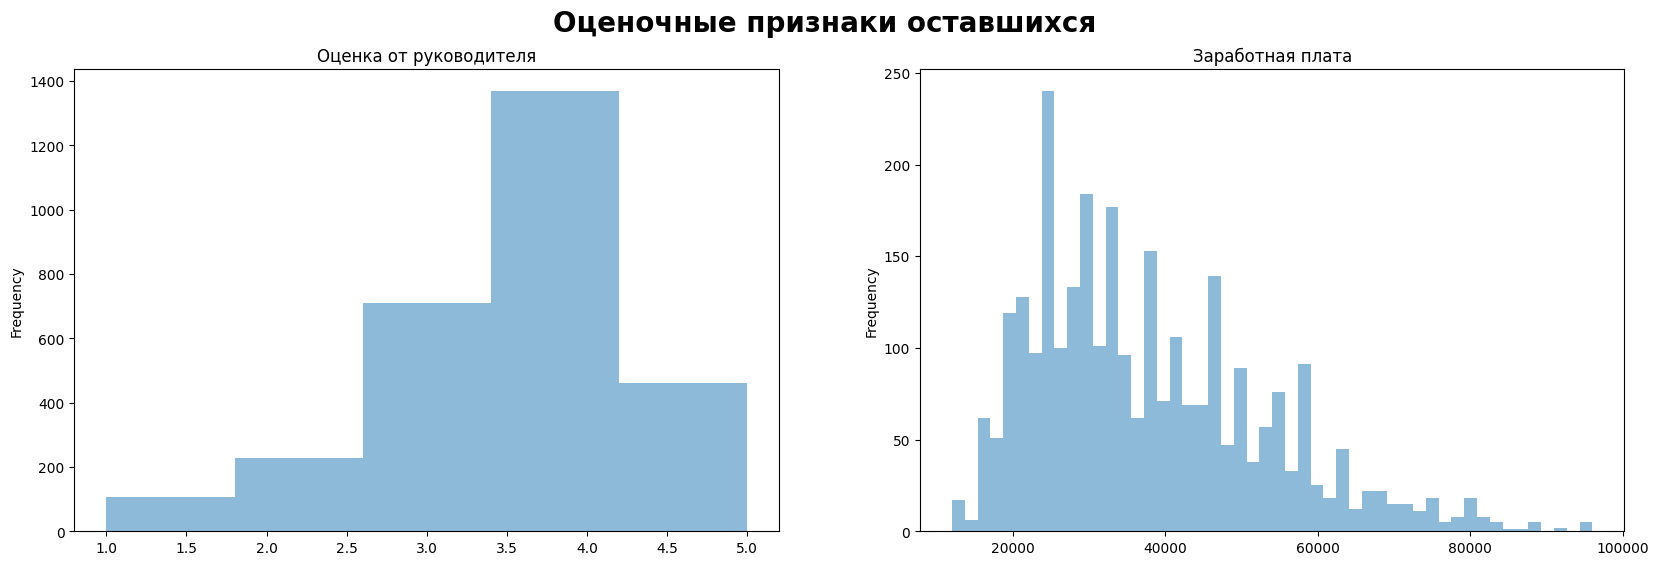

In [ ]:
#оценочные показатели
fig, axes = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Оценочные признаки уволившихся', fontsize = 20, fontweight='bold')
histplt(train_quit_yes, 'supervisor_evaluation', 'Оценка от руководителя', axes[0], 5)
histplt(train_quit_yes, 'salary', 'Заработная плата', axes[1], 50)
fig, axes = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Оценочные признаки оставшихся', fontsize = 20, fontweight='bold')
histplt(train_quit_no, 'supervisor_evaluation', 'Оценка от руководителя', axes[0], 5)
histplt(train_quit_no, 'salary', 'Заработная плата', axes[1], 50)

In [ ]:
#создадим объединеную таблицу для тестовых данных
test_target_quit.set_index('id', inplace=True)
test_quit = test_job_satisfaction_rate.join(test_target_quit)

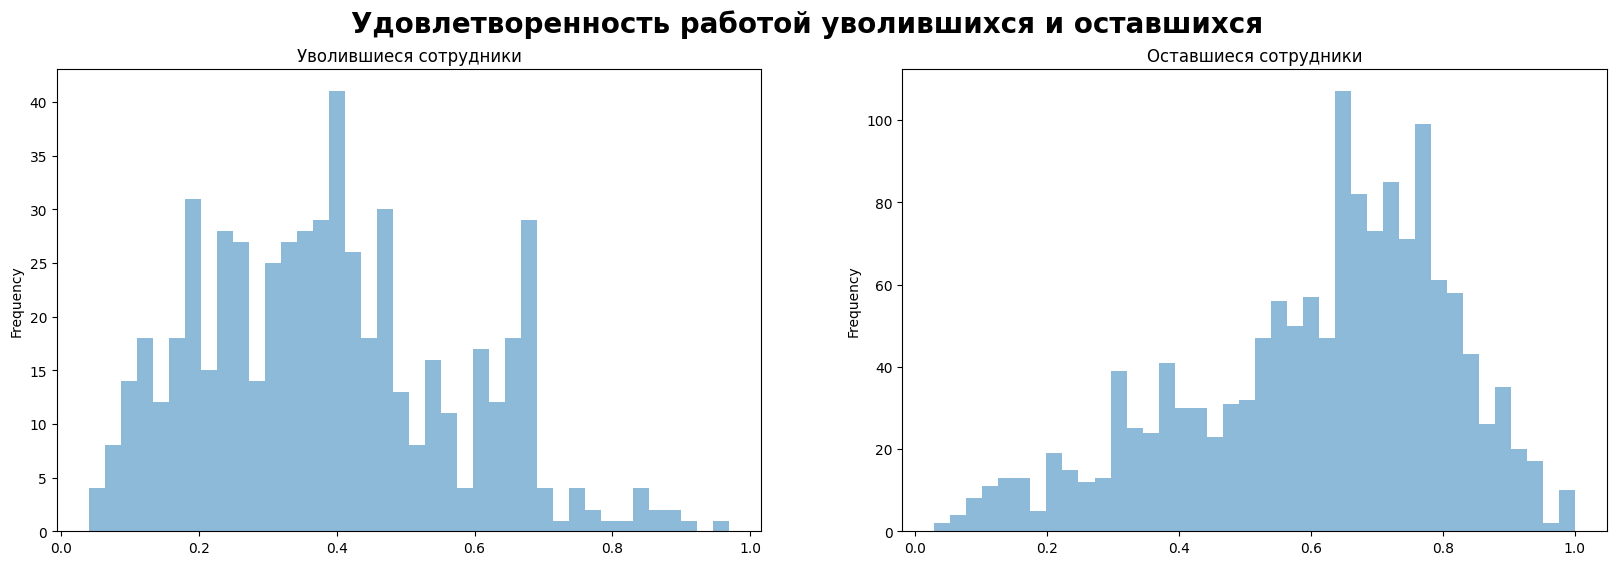

In [ ]:
#посмотрим на распределение удовлетворенности на тестовых данных
#оценочные показатели
fig, axes = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Удовлетворенность работой уволившихся и оставшихся', fontsize = 20, fontweight='bold')
histplt(test_quit.query('quit == "yes"'), 'job_satisfaction_rate', 'Уволившиеся сотрудники', axes[0], 40)
histplt(test_quit.query('quit == "no"'), 'job_satisfaction_rate', 'Оставшиеся сотрудники', axes[1], 40)

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. В этом случае нулевая гипотеза - удовлетворенность работой уволившихся равна удовлетворенности работой оставшихся работников.
Альтернативная гипотеза - удовлетворенность работой уволившихся не равна удовлетворенности работой оставшихся работников.

In [ ]:
#проверим гипотезу
alpha = 0.05
results_time = st.ttest_ind(test_quit.query('quit == "yes"')['job_satisfaction_rate'],\
                            test_quit.query('quit == "no"')['job_satisfaction_rate'])

print('p-значение:', results_time.pvalue)

if (results_time.pvalue < alpha):
    print('Удовлетворенность работой уволившихся не равна удовлетворенности работой оставшихся работников')
else:
    print('Удовлетворенность работой уволившихся равна удовлетворенности работой оставшихся работников')

p-значение: 1.231122066517193e-104
Удовлетворенность работой уволившихся не равна удовлетворенности работой оставшихся работников


**Анализ данных**<br><br>
В собранных данных *28.2%* человек числятся уволившимися. Визуализировав данные по **уволившимся и оставшимся сотрудникам** отдельно, картина становится достаточно очевидной. Большинство ушедших работников провели в компании не больше *3 лет (а чаще всего - 1 год)*. Повышений за это время они не получали и до конца оставались в должности *джуниора*, а уровень нарушений превышал стандартный. Степень их загруженности была *низкой или средней*, а заработная плата - *ниже*, чем у оставшихся коллег. Руководители оценивали их на *троечку*, тогда как оставшихся чаще оценивали *хорошо*.<br>
Получается, что компанию покидали относительно новые сотрудники, не так давно принятые на работу. Это джуниор с невысокой зарплатой, который за время работы не успел особо выделиться и заслужить повышение (да ещё и частенько нарушал трудовой договор). Из-за этого непосредственный руководитель оценивал его чуть ниже остальных коллег.<br>
`Уровень удовлетворенности работой` у уволившихся работников был значительно ниже, чем у оствшихся в компании сотрудников. Для ушедших работников основной пик в районе *0.4*, в то время как у оставшихся пики в диапазоне *0.6-0.8*. К тому же, у уволившихся практически нет значений выше *0.7*.

<a id='2.4'></a>
### Добавление нового входного признака
[К содержанию](#0)

In [ ]:
#добавим в таблицу предсказанный ранее признак job_satisfaction_rate
train_quit['job_satisfaction_rate'] = randomized_search.predict(train_quit.drop(columns=['quit']))
train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.657619
814010,sales,junior,medium,2,no,no,4,27600,no,0.832442
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.369167
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.356875
910140,marketing,junior,medium,2,no,no,5,25200,no,0.794667


**Добавление предсказанного уровня удовлетворенности**<br><br>
Оценка тестовой выборки позволяет сделать вывод о наличии взаимосвязи между `уровнем удовлетворенности работой` и `увольнением сотрудника из компании`, поэтому будем использовать *уровень удовлетворенности работой* как входной признак. Для этого используем ранее получившуюся регрессионную модель и предскажем (*predict*) необходимый признак.

<a id='2.5'></a>
### Подготовка данных
[К содержанию](#0)

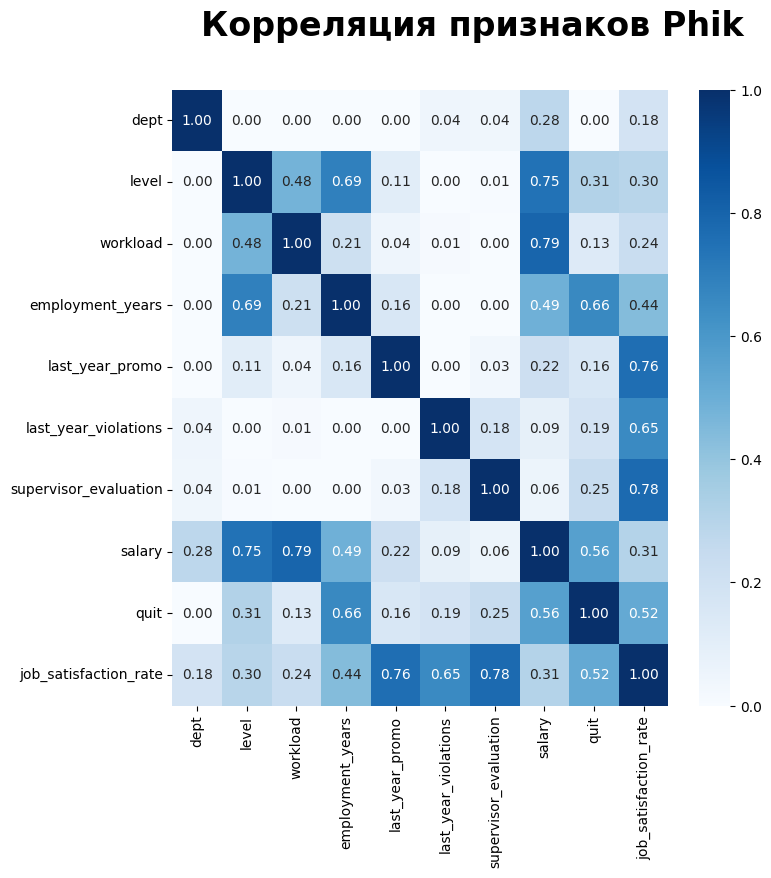

In [ ]:
#узнаем коэффициенты корреляции по Phik
fig, axes = plt.subplots(1, 1, figsize = (8,8))
fig.suptitle('Корреляция признаков Phik', fontsize = 24, fontweight='bold')

interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

sns.heatmap(train_quit.phik_matrix(interval_cols=interval_cols),\
            annot=True, fmt='.2f', cmap='Blues', ax=axes);

In [ ]:
#Разделим тренировочный датасет на входные признаки и целевой признак
RANDOM_STATE = 42

X_train = train_quit.drop(columns=['quit'])
y_train = train_quit['quit']

label_encoder = LabelEncoder()
label_encoder.classes_ = ['no', 'yes']
y_train = label_encoder.fit_transform(y_train)

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = X_train.select_dtypes(include='number').columns.tolist()

**Подготовка данных**<br><br>
Как и в случае первой задачи, наивысшая корреляция коэффициента **ϕk** *0.79* наблюдается между признаками `workload` и `salary`. О мультиколлинеарности утверждать опять же не будем - коэффициенты маловаты для этого.<br>
Признаки делим на **категориальные, ранговые и количественные**. Деление аналогично первой задаче, но с одним добавлением - к количественным признакам добавляется `job_satisfaction_rate`. Предобработка будет производиться в уже созданном пайплайне `data_preprocessor`.

<a id='2.6'></a>
### Обучение моделей
[К содержанию](#0)

In [ ]:
#соберем итоговый пайплайн для второй задачи
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [ ]:
#подготовим параметры для моделей
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            max_iter=10000,
            solver='saga',
            penalty='l1'
        )],
        'models__C': range(1, 200),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10, 100, 1000],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [ ]:
#сравним модели
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                      

In [ ]:
#подготовим тестовую выборку
X_test = test_quit.drop(columns=['quit'])
y_test = test_quit['quit']

y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.9172099409312708


**Предсказание увольнения работника**<br><br>
Для предсказания увольнения работника использовались *четыре* модели - `DecisionTreeClassifier, KNeighborsClassifier, SVC  и LogisticRegression`. С помощью пайплайна `pipe_final`, измененного для моделей классификации, перебором гиперпараметров алгоритмом `RandomizedSearch` была выбрана лучшая модель - **KNeighborsClassifier (n_neighbors=12)**. Модель выбиралась с помощью **ROC-AUC**. Критерий успеха: *ROC-AUC* ≥ 0.91 на тестовой выборке. В нашем случае метрика на тестовой выборке равна *0.917* - таким образом, условие выполнено.

<a id='2.7'></a>
### Вывод о предсказании увольнения работников
[К содержанию](#0)

Лучшей моделью по результатам `RandomizedSearch` для решения второй задачи признана **KNeighborsClassifier** - модель kNN, основанная на методе k-ближайших соседей, используемая для задач классификации. При исследовательском анализе был составлен типичный портрет уволившегося сотрудника. Было выявлено, что уволившиеся сотрудники обладают рядом общих черт, которые помогают их классифицировать. Благодаря этим совпадениям сразу по нескольким признакам модель kNN показывает хорошие результаты, выдавая метрику **ROC-AUC** *0.924* на тренировочной выборке и *0.917* на тестовой.

<a id='3'></a>
## Общий вывод
[К содержанию](#0)

Проект включал в себя **две** задачи:
1. Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
2. Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Удовлетворённость работой напрямую влияет на отток сотрудников, а предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Для решения задач были представлены различные *датасеты* с данными о сотрудниках. Среди них — *уровень удовлетворённости сотрудника работой в компании*. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от `0 до 1`, где `0` — совершенно неудовлетворён, `1` — полностью удовлетворён.<br>
Первоначально была проведена предобработка (заполнение пустых ячеек) и исследовательский анализ данных. Первая задача представляет собой задачу регрессии с целевым признаком `job_satisfaction_rate`, поэтому сравнивались модели `DecisionTreeRegressor и LinearRegression`. Для обучения моделей признаки подготавливались с помощью *пайплайнов*. После разделения признаков по типам и выбора соответсвующих инструментов для кодирования или скалирования алгоритмом `RandomizedSearch` была определена лучшая модель - ей оказалась `DecisionTreeRegressor`. Качество моделей регрессии определялось метрикой **SMAPE**.<br>
Вторая задача - это задача классификации с целевым признаком `quit`. После предобработки на стадии исследовательского анализа был составлен *портрет уволившегося сотрудника*. Благодаря исследовательскому анализу и составлению портрета была выявлена взаимосвязь между `уровнем удовлетворенности сотрудника и увольнением`. Было решено добавить ранее предсказанный признак `job_satisfaction_rate` в качестве нового входного признака для предсказания увольнения работника. Для данной задачи сравнивались модели `DecisionTreeClassifier, KNeighborsClassifier, SVC и LogisticRegression`, среди которых лучшей была признана модель `KNeighborsClassifier`. Модели второй задачи сравнивали с помощью метрики **ROC-AUC**.

Типичный уволившийся работник - это *джуниор с невысокой зарплатой, который за время работы не успел особо выделиться и заслужить повышение (да ещё и частенько нарушал трудовой договор), из-за чего непосредственный руководитель оценивал его чуть ниже остальных коллег.* Понятно, что новые сотрудники ещё только присматриваются к работе и увольняются в случае, если им некомофортно на новом месте. Однако гораздо важнее отловить сотрудника на высокой позиции, у которого отношение к работе меняется в сторону ухудшения. В этом случае можно наблюдать за оценкой работы - *как самим работником, так и его руководителем.* Если данные показатели снизились - то это может быть сигналом того, что человек теряет интерес к работе и начинает работать хуже. Говоря о численных показателях, можно указать такие границы:
- `оценка от руководителя` - 3 балла и ниже;
- `оценка от работника` - 0.7 и ниже.

В случае наличия данных по опросам рекомендуется обращать внимание на подобные показатели - это поможет заранее понять, что человек настроен на увольнение. Также заметно, что у уволившихся приблизительно равное соотношение людей с *низкой и средней загруженностью*, тогда как у оставшихся в основном *средний* уровень загруженности. Можно предположить, что у людей нет задач для выполнения - в этом случае рекомендуется руководителям определить целесообразность такого штата либо же равномернее распределить задачи между работниками. В случае распределения задач у младших сотрудников появится возможность проявить себя при выполнении работы, что может привести к повышению по карьерной лестнице, увеличению оценки от руководителя, а также зарплаты, что в свою очередь может побудить сотрудника остаться и развиваться в компании дальше.